In [1]:
import sys
sys.path.append("lib")
import geopandas as gpd
import shapely as sh
from pyproj import CRS
epsg4326 = CRS.from_epsg(4326)
import pandas as pd
from progressbar import progressbar as pbar
import numpy as np
import matplotlib.pyplot as plt
from lib import osm

## load boundaries of California


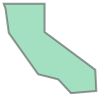

In [2]:

cc = gpd.read_file("data/CA_State_TIGER2016.shp").to_crs(epsg4326)
c = cc.geometry[0]
c = list(c.geoms)[6].simplify(tolerance=.5)
caldf = gpd.GeoDataFrame(geometry=[c], crs=epsg4326)
c

## split AOI so that OSM queries are lighter

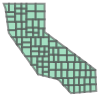

In [3]:
key = 'highway'
ao = osm.OSMAOI(c, key=key)
s = ao.geoms[1]
ao.geom

## run OSM queries

run several times until completion if any timeout

## `node`

In [4]:
ao.getobjs(objtype='node')

retrieving 97 missing objects of type node out of 97


100% (97 of 97) |########################| Elapsed Time: 0:04:45 Time:  0:04:45


In [6]:
sum([len(n.nodes) for n in ao.nodes.values()])

768790

In [6]:
n = [i for ni in pbar(ao.nodes.values()) for i in ni.nodes]
gg = gpd.GeoDataFrame([ni.tags for ni in pbar(n)], geometry=[sh.geometry.Point(i.lon, i.lat) for i in pbar(n)], crs=epsg4326)
len(n)

100% (97 of 97) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (768896 of 768896) |################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (768896 of 768896) |################| Elapsed Time: 0:00:09 Time:  0:00:09


768896

In [7]:
gg.to_parquet(f"data/california_osm_{key}_node.parquet")

In [8]:
gcc = gg[key].value_counts()
gcc.index = [f"{k} {v:8d}" for k,v in dict(gcc).items()]

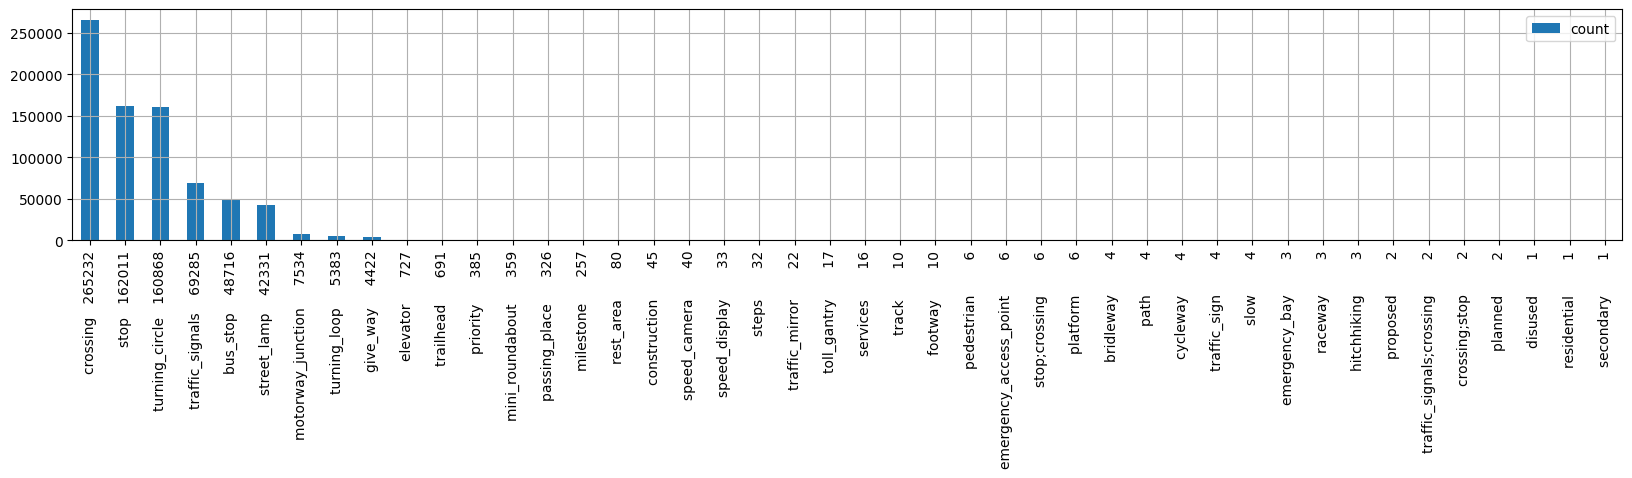

In [9]:
pd.DataFrame(gcc).plot(kind='bar', figsize=(20,3))
plt.grid()

## `way`

In [ ]:
ao.getobjs(objtype='way')

retrieving 97 missing objects of type way out of 97


 13% (13 of 97) |###                     | Elapsed Time: 0:04:05 ETA:   2:13:14

retrying 36795554251e1 IncompleteRead(0 bytes read)
retrying 36795554251e1 IncompleteRead(0 bytes read)
retrying 36795554251e1 IncompleteRead(0 bytes read)
retrying 36795554251e1 IncompleteRead(0 bytes read)
retrying 36795554251e1 IncompleteRead(0 bytes read)
retrying 36795554251e1 runtime error: Query timed out in "print" at line 5 after 487 seconds.
retrying 36795554251e1 runtime error: Query timed out in "print" at line 5 after 500 seconds.
retrying 36795554251e1 runtime error: Query timed out in "print" at line 5 after 469 seconds.
retrying 36795554251e1 IncompleteRead(0 bytes read)
retrying 36795554251e1 <urlopen error [Errno -3] Temporary failure in name resolution>
retrying 36795554251e1 <urlopen error [Errno -3] Temporary failure in name resolution>
retrying 36795554251e1 runtime error: Query timed out in "print" at line 5 after 490 seconds.
retrying 36795554251e1 runtime error: Query timed out in "print" at line 5 after 535 seconds.
retrying 36795554251e1 IncompleteRead(0 byte

In [17]:
sum([len(n.ways) for n in ao.nodes.values()])

0

## `rel`

In [ ]:
ao.getobjs(objtype='rel')